# Day 11 Part 2

documenting my attempts to solve, ultimately looking up solution + explanation online, then fixing my code based on what I learned.
<br>
<br>

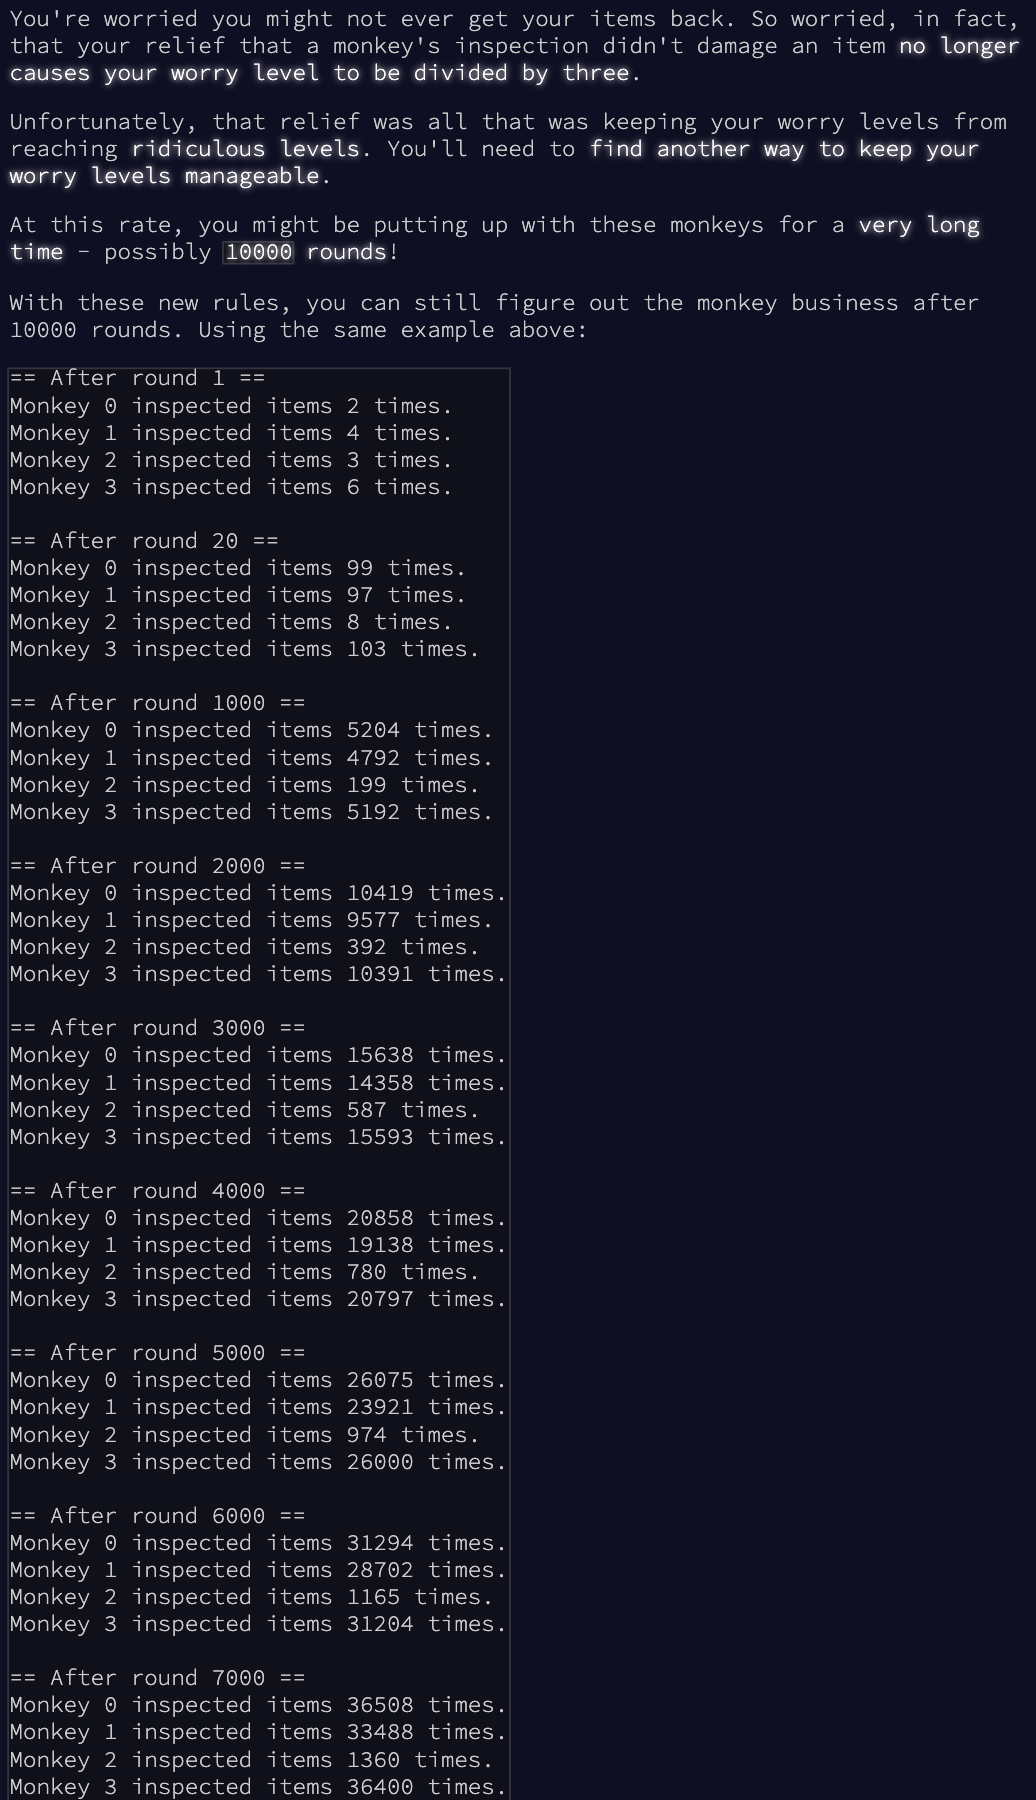

In [1]:
from IPython import display
display.Image("day11part2instructionsA.jpeg")

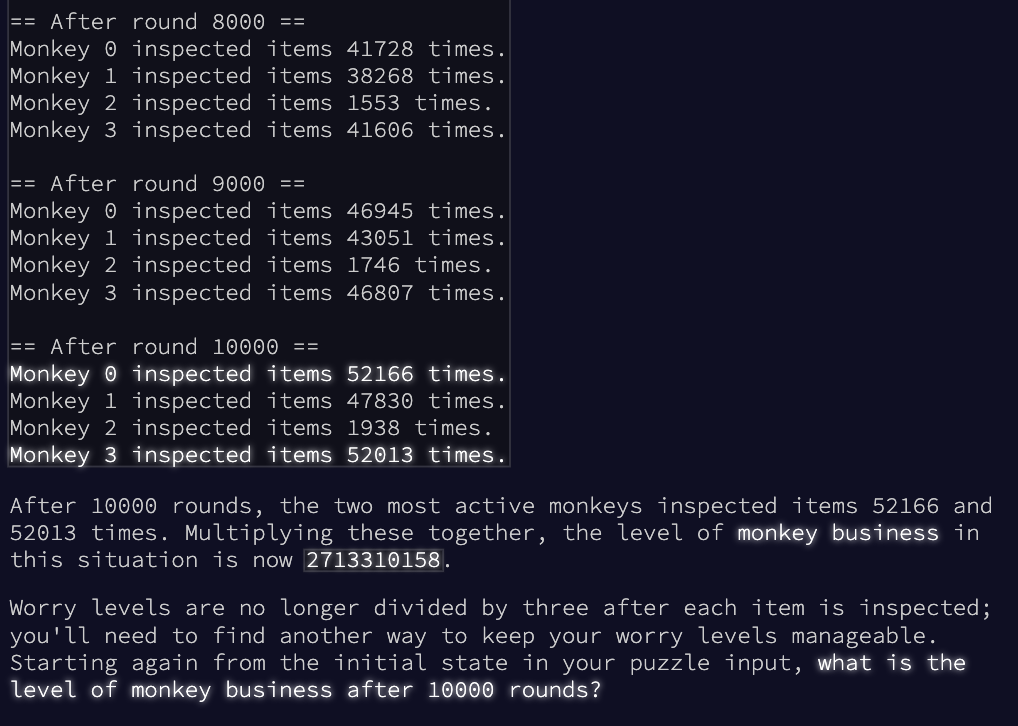

In [2]:
display.Image("day11part2instructionsB.jpeg")

## reusing code from part 1, just dropping the 'divide by 3' step

**problem:** Items' worry scores increase exponentially each round, computer can't handle doing modulus on numbers so huge, can calculate for first few rounds but can't reach anywhere close to 10000.

In [3]:
monkey0 = {'items':[53,89,62,57,74,51,83,97],'operation':['*', 3],'divtest':13,'truethrow':1,'falsethrow':5,'inspections':0}
monkey1 = {'items':[85,94,97,92,56],'operation':['+', 2],'divtest':19,'truethrow':5,'falsethrow':2,'inspections':0}
monkey2 = {'items':[86,82,82],'operation':['+', 1],'divtest':11,'truethrow':3,'falsethrow':4,'inspections':0}
monkey3 = {'items':[94,68],'operation':['+', 5],'divtest':17,'truethrow':7,'falsethrow':6,'inspections':0}
monkey4 = {'items':[83,62,74,58,96,68,85],'operation':['+', 4],'divtest':3,'truethrow':3,'falsethrow':6,'inspections':0}
monkey5 = {'items':[50,68,95,82],'operation':['+', 8],'divtest':7,'truethrow':2,'falsethrow':4,'inspections':0}
monkey6 = {'items':[75],'operation':['*', 7],'divtest':5,'truethrow':7,'falsethrow':0,'inspections':0}
monkey7 = {'items':[92,52,85,89,68,82],'operation':'squared','divtest':2,'truethrow':0,'falsethrow':1,'inspections':0}

monkeylist = [monkey0,monkey1,monkey2,monkey3,monkey4,monkey5,monkey6,monkey7]

worry_lowerer = 2 * 3 * 5 * 7 * 11 * 13 * 17 * 19

inspections = ([0],[0],[0],[0],[0],[0],[0],[0])

for round in range(10000):

    for monkey in monkeylist:
        inspected_items = []
        for item in monkey['items']:
            monkey['inspections'] += 1
            if monkey['operation'] == 'squared':
                inspected_items.append(item * item)
            elif monkey['operation'][0] == '+':
                inspected_items.append(item + monkey['operation'][1])
            elif monkey['operation'][0] == '*':
                inspected_items.append(item * monkey['operation'][1])
        monkey['items'] = inspected_items
        for i in range(len(monkey['items'])):
            item_to_throw = monkey['items'].pop(0)
            if item_to_throw % monkey['divtest'] == 0:
                throw_to = monkey['truethrow']
                monkeylist[throw_to]['items'].append(item_to_throw)
            else:
                throw_to = monkey['falsethrow']
                monkeylist[throw_to]['items'].append(item_to_throw)
                
    for m,monkey in enumerate(monkeylist):
        inspections[m].append(monkey['inspections'])

for m,inspection in enumerate(inspections):
    print(f'monkey {m}: {inspection[-1]}')
    
    

KeyboardInterrupt: 

^can't reach 10000 rounds!

## attempting to handle the huge worry scores

Used some modulus arithmetic properties to make the modulus more efficient. This increased the number of rounds that could be calculated, but still couldn't reach close to 10000.

**the properties:**

(a + b) %c <br>
== <br>
(a%c + b%c) %c

(a x b) %c <br>
== <br>
(a%c x b%c) %c



examples:

In [4]:
(16 + 31)%4

3

In [5]:
(16%4 + 31%4)%4

3

In [6]:
(16 * 31)%4

0

In [7]:
(16%4 * 31%4)%4

0

In [8]:
import time
start_time = time.time()
from collections import deque 

monkey0 = {'items':deque([53,89,62,57,74,51,83,97]),'operation':['*', 3],'divtest':13,'truethrow':1,'falsethrow':5,'inspections':0}
monkey1 = {'items':deque([85,94,97,92,56]),'operation':['+', 2],'divtest':19,'truethrow':5,'falsethrow':2,'inspections':0}
monkey2 = {'items':deque([86,82,82]),'operation':['+', 1],'divtest':11,'truethrow':3,'falsethrow':4,'inspections':0}
monkey3 = {'items':deque([94,68]),'operation':['+', 5],'divtest':17,'truethrow':7,'falsethrow':6,'inspections':0}
monkey4 = {'items':deque([83,62,74,58,96,68,85]),'operation':['+', 4],'divtest':3,'truethrow':3,'falsethrow':6,'inspections':0}
monkey5 = {'items':deque([50,68,95,82]),'operation':['+', 8],'divtest':7,'truethrow':2,'falsethrow':4,'inspections':0}
monkey6 = {'items':deque([75]),'operation':['*', 7],'divtest':5,'truethrow':7,'falsethrow':0,'inspections':0}
monkey7 = {'items':deque([92,52,85,89,68,82]),'operation':'squared','divtest':2,'truethrow':0,'falsethrow':1,'inspections':0}

monkeylist = [monkey0,monkey1,monkey2,monkey3,monkey4,monkey5,monkey6,monkey7]

round_generator = (n for n in range(10000))

no_div_inspections = ([0],[0],[0],[0],[0],[0],[0],[0])

for round in round_generator:
    print(f"round {round+1}")
    for i,monkey in enumerate(monkeylist):
        mod = monkey['divtest']
        operation = monkey['operation']
        truethrow = monkey['truethrow']
        falsethrow = monkey['falsethrow']
        for n in range(len(monkey['items'])):
            monkey['inspections'] += 1
            item_to_throw = monkey['items'].popleft()
            if operation == 'squared':
                if ((item_to_throw%mod) * (item_to_throw%mod))% mod == 0:
                    throw_to = truethrow
                    monkeylist[throw_to]['items'].append(item_to_throw * item_to_throw)
                else:
                    throw_to = falsethrow
                    monkeylist[throw_to]['items'].append(item_to_throw * item_to_throw)
            elif operation[0] == '+':
                if ((item_to_throw%mod) + (operation[1]%mod))% mod == 0:
                    throw_to = truethrow
                    monkeylist[throw_to]['items'].append(item_to_throw + operation[1])
                else:
                    throw_to = falsethrow
                    monkeylist[throw_to]['items'].append(item_to_throw + operation[1])
            elif operation[0] == '*':
                if ((item_to_throw%mod) * (operation[1]%mod))% mod == 0:
                    throw_to = truethrow
                    monkeylist[throw_to]['items'].append(item_to_throw * operation[1])
                else:
                    throw_to = falsethrow
                    monkeylist[throw_to]['items'].append(item_to_throw * operation[1])     
    for m,monkey in enumerate(monkeylist):
        no_div_inspections[m].append(monkey['inspections'])


end_time = time.time()
print()
print(f"It took {end_time-start_time:.2f} seconds to compute")


round 1
round 2
round 3
round 4
round 5
round 6
round 7
round 8
round 9
round 10
round 11
round 12
round 13
round 14
round 15
round 16
round 17
round 18
round 19
round 20
round 21
round 22
round 23
round 24
round 25
round 26
round 27
round 28
round 29
round 30
round 31
round 32
round 33
round 34
round 35
round 36
round 37
round 38
round 39
round 40
round 41
round 42
round 43
round 44
round 45
round 46
round 47
round 48
round 49
round 50
round 51
round 52
round 53
round 54
round 55
round 56
round 57
round 58
round 59
round 60
round 61
round 62
round 63
round 64
round 65
round 66
round 67
round 68
round 69
round 70
round 71
round 72
round 73
round 74
round 75
round 76
round 77
round 78
round 79
round 80
round 81
round 82
round 83
round 84
round 85
round 86
round 87
round 88
round 89
round 90
round 91
round 92
round 93
round 94
round 95
round 96
round 97
round 98
round 99
round 100
round 101
round 102
round 103
round 104
round 105
round 106
round 107
round 108
round 109
round 110
round 11

KeyboardInterrupt: 

^still can't reach 10000 rounds!

## solution provided by <a href ="https://chasingdings.com/2022/12/11/advent-of-code-day-11-monkey-in-the-middle/">chsingdings.com</a>

In [9]:
class Monkey:
    def __init__(self, monkey_do):
        monkey_stats = monkey_do.splitlines()
        self.items = eval('[' + monkey_stats[1][18:] + ']')
        self.operation = eval('lambda old: ' + monkey_stats[2][19:])
        self.test = int(monkey_stats[3][21:])
        self.iftrue = int(monkey_stats[4][29:])
        self.iffalse = int(monkey_stats[5][30:])
        self.inspect_count = 0
    
    def play(self, worry_divider):
        while self.items:
            self.inspect_count += 1
            worry = self.operation(self.items.pop(0))
            worry = worry % 9699690 if worry_divider == 1 else worry // worry_divider
            yield self.iffalse if worry % self.test else self.iftrue, worry

def play_a_game(rounds, worry_divider):
    with open(r'day11input.txt') as f:
        monkeys = [Monkey(monkey_do) for monkey_do in f.read().split('\n\n')]

    for _ in range(rounds):
        for monkey in monkeys:
            for catcher, worry in monkey.play(worry_divider):
                monkeys[catcher].items.append(worry)

    return (lambda x, y: x.inspect_count * y.inspect_count) \
        (*sorted(monkeys, key=lambda monkey: monkey.inspect_count)[-2:])

part2 = play_a_game(10000, 1)
print("Part 2:", part2)

Part 2: 19457438264


**Explanation:**


"If we want to consider two numbers, say, 3 and 5. If we take 27 and modulo 3, great, the result is zero. But if we take 27 and modulo 5, we get 2, since it doesn’t divide evenly into 5. But after modulo with 3, we’re left with zero, which is evenly divided by 5, so the properties of the number has been changed.

If we multiply 3 and 5 to get 15, and perform the operation, we get 12 — which is evenly divisible by 3, and has a remainder of 2 when modulo with 5. So for the purposes of this argument, 12 and 27 are identical."

In [10]:
print("demonstration of the above:")
print()
print(f'27 % 3 = {27%3}')
print(f'27 % 5 = {27%5}')
print()
print('3 x 5 = 15')
print(f'27 % 15 = {27%15}')
print()
print(f'12 % 3 = {12%3}')
print(f'12 % 5 = {12%5}')

demonstration of the above:

27 % 3 = 0
27 % 5 = 2

3 x 5 = 15
27 % 15 = 12

12 % 3 = 0
12 % 5 = 2


In [11]:
print('testing with different numbers:')
print()
print(f'103 % 11 = {103%11}')
print(f'103 % 7 = {103%7}')
print()
print('11 x 7 = 77')
print(f'103 % 77 = {103%77}')
print()
print(f'26 % 11 = {26%11}')
print(f'26 % 7 = {26%7}')

testing with different numbers:

103 % 11 = 4
103 % 7 = 5

11 x 7 = 77
103 % 77 = 26

26 % 11 = 4
26 % 7 = 5


"In the puzzle, we have the first eight prime numbers — 2, 3, 5, 7, 11, 13, 17, and 19. These are the tests to perform. Multiplying these all together gets us 9699690 — and this is how we stop from having numbers go way out of control. No number can ever get above this, which is easily held within Java’s “Long” type."

In [12]:
# multiplying up the modulo tests from each of the 8 monkeys to get the 'worry_lowerer':

worry_lowerer = 2 * 3 * 5 * 7 * 11 * 13 * 17 * 19
print(worry_lowerer)

9699690


In [13]:
# testing out the 'worry_lowerer' trick on big numbers

big_number = 1230589120395812039581095803285230852038570329230957259
print(f'modulo of big number by 7 = {big_number%7}')
print(f'modulo of big number first by worry divider, then by 7 = {(big_number%worry_lowerer)%7}')


modulo of big number by 7 = 6
modulo of big number first by worry divider, then by 7 = 6


In [14]:
big_number = 12305891203958120395810958032852308520385703292309572590275039223095230489109237
print(f'modulo of big number by 13 = {big_number%13}')
print(f'modulo of big number first by worry divider, then by 13 = {(big_number%worry_lowerer)%13}')


modulo of big number by 13 = 12
modulo of big number first by worry divider, then by 13 = 12


In [15]:
big_number = 123058912039581203958109580328523085203857032923095725902750392230952304891092375034223823012395710597
print(f'modulo of big number by 17 = {big_number%17}')
print(f'modulo of big number first by worry divider, then by 17 = {(big_number%worry_lowerer)%17}')


modulo of big number by 17 = 1
modulo of big number first by worry divider, then by 17 = 1


## building my own code with 'worry_lowerer' trick

In [16]:
monkey0 = {'items':[53,89,62,57,74,51,83,97],'operation':['*', 3],'divtest':13,'truethrow':1,'falsethrow':5,'inspections':0}
monkey1 = {'items':[85,94,97,92,56],'operation':['+', 2],'divtest':19,'truethrow':5,'falsethrow':2,'inspections':0}
monkey2 = {'items':[86,82,82],'operation':['+', 1],'divtest':11,'truethrow':3,'falsethrow':4,'inspections':0}
monkey3 = {'items':[94,68],'operation':['+', 5],'divtest':17,'truethrow':7,'falsethrow':6,'inspections':0}
monkey4 = {'items':[83,62,74,58,96,68,85],'operation':['+', 4],'divtest':3,'truethrow':3,'falsethrow':6,'inspections':0}
monkey5 = {'items':[50,68,95,82],'operation':['+', 8],'divtest':7,'truethrow':2,'falsethrow':4,'inspections':0}
monkey6 = {'items':[75],'operation':['*', 7],'divtest':5,'truethrow':7,'falsethrow':0,'inspections':0}
monkey7 = {'items':[92,52,85,89,68,82],'operation':'squared','divtest':2,'truethrow':0,'falsethrow':1,'inspections':0}

monkeylist = [monkey0,monkey1,monkey2,monkey3,monkey4,monkey5,monkey6,monkey7]

worry_lowerer = 2 * 3 * 5 * 7 * 11 * 13 * 17 * 19

inspections = ([0],[0],[0],[0],[0],[0],[0],[0])

for round in range(10000):

    for monkey in monkeylist:
        inspected_items = []
        for item in monkey['items']:
            monkey['inspections'] += 1
            if monkey['operation'] == 'squared':
                inspected_items.append(item * item)
            elif monkey['operation'][0] == '+':
                inspected_items.append(item + monkey['operation'][1])
            elif monkey['operation'][0] == '*':
                inspected_items.append(item * monkey['operation'][1])
        inspected_items = [item%worry_lowerer for item in inspected_items]
        monkey['items'] = inspected_items
        for i in range(len(monkey['items'])):
            item_to_throw = monkey['items'].pop(0)
            if item_to_throw % monkey['divtest'] == 0:
                throw_to = monkey['truethrow']
                monkeylist[throw_to]['items'].append(item_to_throw)
            else:
                throw_to = monkey['falsethrow']
                monkeylist[throw_to]['items'].append(item_to_throw)
                
    for m,monkey in enumerate(monkeylist):
        inspections[m].append(monkey['inspections'])

for m,inspection in enumerate(inspections):
    print(f'monkey {m}: {inspection[-1]}')
    


monkey 0: 125166
monkey 1: 31129
monkey 2: 31117
monkey 3: 109613
monkey 4: 140743
monkey 5: 109637
monkey 6: 138248
monkey 7: 31126


In [17]:
m0,m1,m2,m3,m4,m5,m6,m7 = inspections
top_two_monkeys = [m4,m6]
top_two_monkeys = [inspection[-1] for inspection in top_two_monkeys]
top_two_monkeys

[140743, 138248]

In [18]:
monkey_business_score = top_two_monkeys[0] * top_two_monkeys[1]
monkey_business_score

19457438264

^it works!